In [1]:
%run ./2020-02-13_utils.ipynb

/ahg/regevdata/users/oursu/software/anaconda3/lib/python3.6/site-packages/scanpy/api/__init__.py:7: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning,


scanpy==1.5.1 anndata==0.7.1 umap==0.4.4 numpy==1.17.2 scipy==1.4.1 pandas==0.24.2 scikit-learn==0.22 statsmodels==0.11.0 python-igraph==0.7.1 louvain==0.6.1 leidenalg==0.8.1


In [2]:
PROTEIN='TP53'
DATA='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14'
SUBSAMPLED=DATA+'/'+PROTEIN+'/subsampled/A549.'+PROTEIN
counts=20000

FIGS=DATA+'/Figures/'

The dataset we will use for the paper
==

will be the downsampled to 20k counts/cell, so we can account nicely for sequencing depth across channels.

In [3]:
adata=sc.read(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.h5ad')
adata

Only considering the two last: ['.counts_per_cell20000', '.h5ad'].
Only considering the two last: ['.counts_per_cell20000', '.h5ad'].


AnnData object with n_obs × n_vars = 162314 × 24839 
    obs: 'TP53_A159P', 'TP53_A159V', 'TP53_C135F', 'TP53_C135Y', 'TP53_C141Y', 'TP53_C176F', 'TP53_C176Y', 'TP53_C238F', 'TP53_C238Y', 'TP53_C242F', 'TP53_C275F', 'TP53_C275Y', 'TP53_C277F', 'TP53_E271K', 'TP53_E285K', 'TP53_E286K', 'TP53_G105C', 'TP53_G154V', 'TP53_G244C', 'TP53_G245C', 'TP53_G245D', 'TP53_G245S', 'TP53_G245V', 'TP53_G266E', 'TP53_G266R', 'TP53_G266V', 'TP53_H179R', 'TP53_H179Y', 'TP53_H193L', 'TP53_H193R', 'TP53_H193Y', 'TP53_H214R', 'TP53_I195T', 'TP53_K132N', 'TP53_K132R', 'TP53_L194R', 'TP53_M237I', 'TP53_M246V', 'TP53_P151S', 'TP53_P152L', 'TP53_P250L', 'TP53_P278L', 'TP53_P278S', 'TP53_R110L', 'TP53_R158H', 'TP53_R158L', 'TP53_R175H', 'TP53_R213Q', 'TP53_R248L', 'TP53_R248W', 'TP53_R249M', 'TP53_R249S', 'TP53_R273C', 'TP53_R273H', 'TP53_R273L', 'TP53_R280K', 'TP53_R280T', 'TP53_R282W', 'TP53_R337C', 'TP53_R337L', 'TP53_S127F', 'TP53_S241C', 'TP53_S241F', 'TP53_V157F', 'TP53_V173L', 'TP53_V173M', 'TP53_V216M', 

In [4]:
import copy
adata.obs['n_counts_downsampled'] = adata.X.sum(axis=1).A1
adata.obs['n_counts_original'] = copy.deepcopy(adata.obs['n_counts'])

In [5]:
adata.write(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.h5ad')

In [6]:
adata=sc.read(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.h5ad')
adata

Only considering the two last: ['.counts_per_cell20000', '.h5ad'].
Only considering the two last: ['.counts_per_cell20000', '.h5ad'].


AnnData object with n_obs × n_vars = 162314 × 24839 
    obs: 'TP53_A159P', 'TP53_A159V', 'TP53_C135F', 'TP53_C135Y', 'TP53_C141Y', 'TP53_C176F', 'TP53_C176Y', 'TP53_C238F', 'TP53_C238Y', 'TP53_C242F', 'TP53_C275F', 'TP53_C275Y', 'TP53_C277F', 'TP53_E271K', 'TP53_E285K', 'TP53_E286K', 'TP53_G105C', 'TP53_G154V', 'TP53_G244C', 'TP53_G245C', 'TP53_G245D', 'TP53_G245S', 'TP53_G245V', 'TP53_G266E', 'TP53_G266R', 'TP53_G266V', 'TP53_H179R', 'TP53_H179Y', 'TP53_H193L', 'TP53_H193R', 'TP53_H193Y', 'TP53_H214R', 'TP53_I195T', 'TP53_K132N', 'TP53_K132R', 'TP53_L194R', 'TP53_M237I', 'TP53_M246V', 'TP53_P151S', 'TP53_P152L', 'TP53_P250L', 'TP53_P278L', 'TP53_P278S', 'TP53_R110L', 'TP53_R158H', 'TP53_R158L', 'TP53_R175H', 'TP53_R213Q', 'TP53_R248L', 'TP53_R248W', 'TP53_R249M', 'TP53_R249S', 'TP53_R273C', 'TP53_R273H', 'TP53_R273L', 'TP53_R280K', 'TP53_R280T', 'TP53_R282W', 'TP53_R337C', 'TP53_R337L', 'TP53_S127F', 'TP53_S241C', 'TP53_S241F', 'TP53_V157F', 'TP53_V173L', 'TP53_V173M', 'TP53_V216M', 

In [7]:
#plot the distribution of counts per channel
counts_df=pd.DataFrame({'counts':adata.obs['n_counts'],
                    'counts_downsampled':adata.obs['n_counts_downsampled'],
                    'channel':adata.obs['batch']})

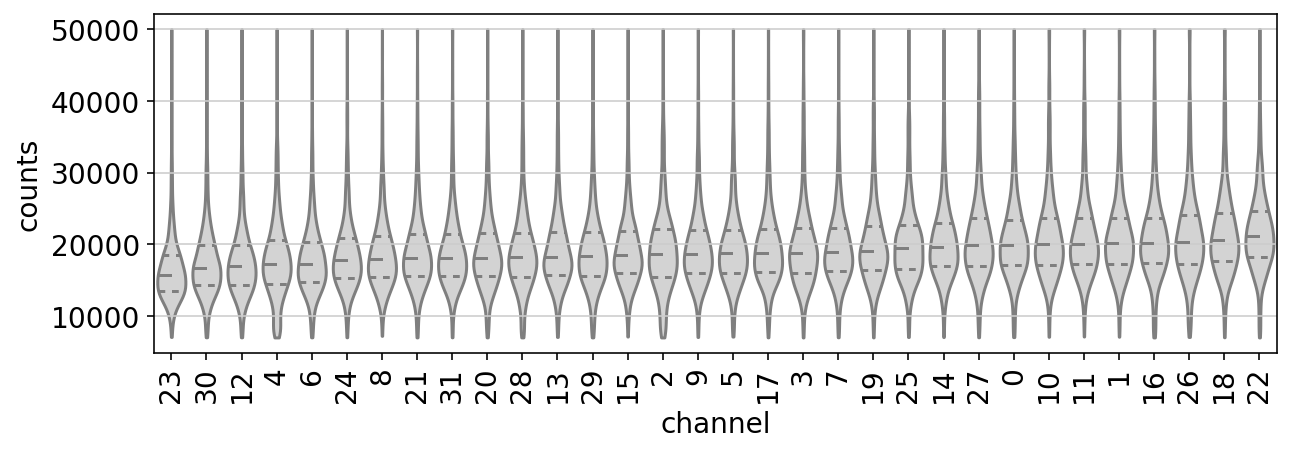

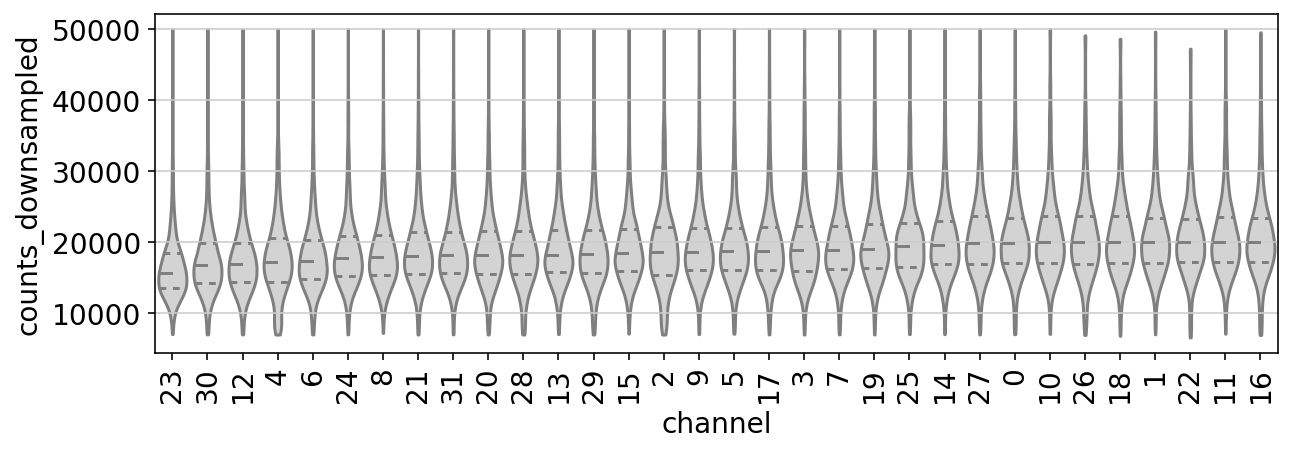

In [8]:
hue_dict={}
for ch in list(set(counts_df['channel'])):
    hue_dict[ch]='lightgray'
    
sorted_catplot(counts_df,'channel','counts','channel',
              hue_dict,figwidth=10,figheight=3)
sorted_catplot(counts_df,'channel','counts_downsampled','channel',
              hue_dict,figwidth=10,figheight=3)

Expression of variant barcodes
---

Trying to set attribute `.obs` of view, copying.


   variant             p  sign       lfc          p.bh  signed_minuslogp.bh
93   M237I  4.115097e-20  -1.0 -0.691935  4.073946e-18           -17.389985
21   Y236C  2.014330e-16  -1.0 -0.597216  9.970935e-15           -14.001264
46   C242F  1.227864e-06  -1.0 -0.347218  4.051951e-05            -4.392336
2    Y234C  8.734157e-06  -1.0 -0.314308  2.161704e-04            -3.665204
15    P47P  2.044793e-05   1.0  0.278944  4.048691e-04             3.392685
33     Q5R  3.605651e-05  -1.0 -0.294737  5.949324e-04            -3.225532
90   P359P  6.022685e-05   1.0  0.249459  8.517797e-04             3.069673
38   Y220C  9.395726e-05  -1.0 -0.276689  1.162721e-03            -2.934524
45   S366A  4.351752e-04  -1.0 -0.252083  4.786927e-03            -2.319943
7    R248W  7.287624e-04  -1.0 -0.224933  7.214747e-03            -2.141779
67   A159P  1.228252e-03  -1.0 -0.207556  1.105427e-02            -1.956470
5    C277F  1.706566e-03   1.0  0.188253  1.407917e-02             1.851423
10   E339K  

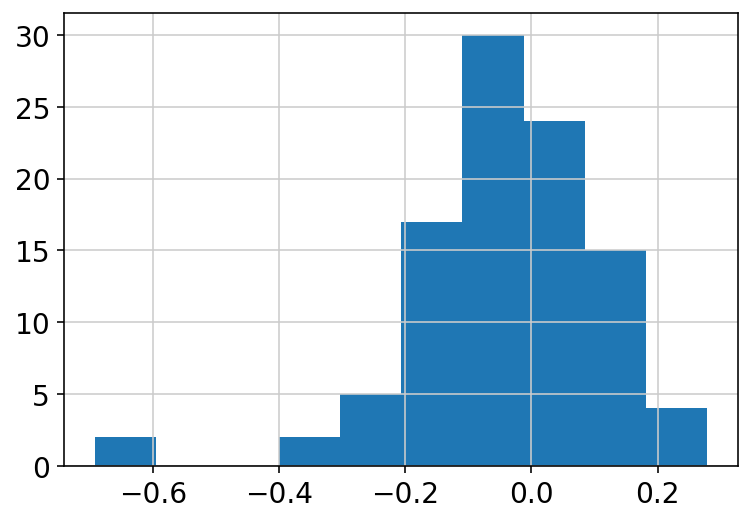

/ahg/regevdata/users/oursu/software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


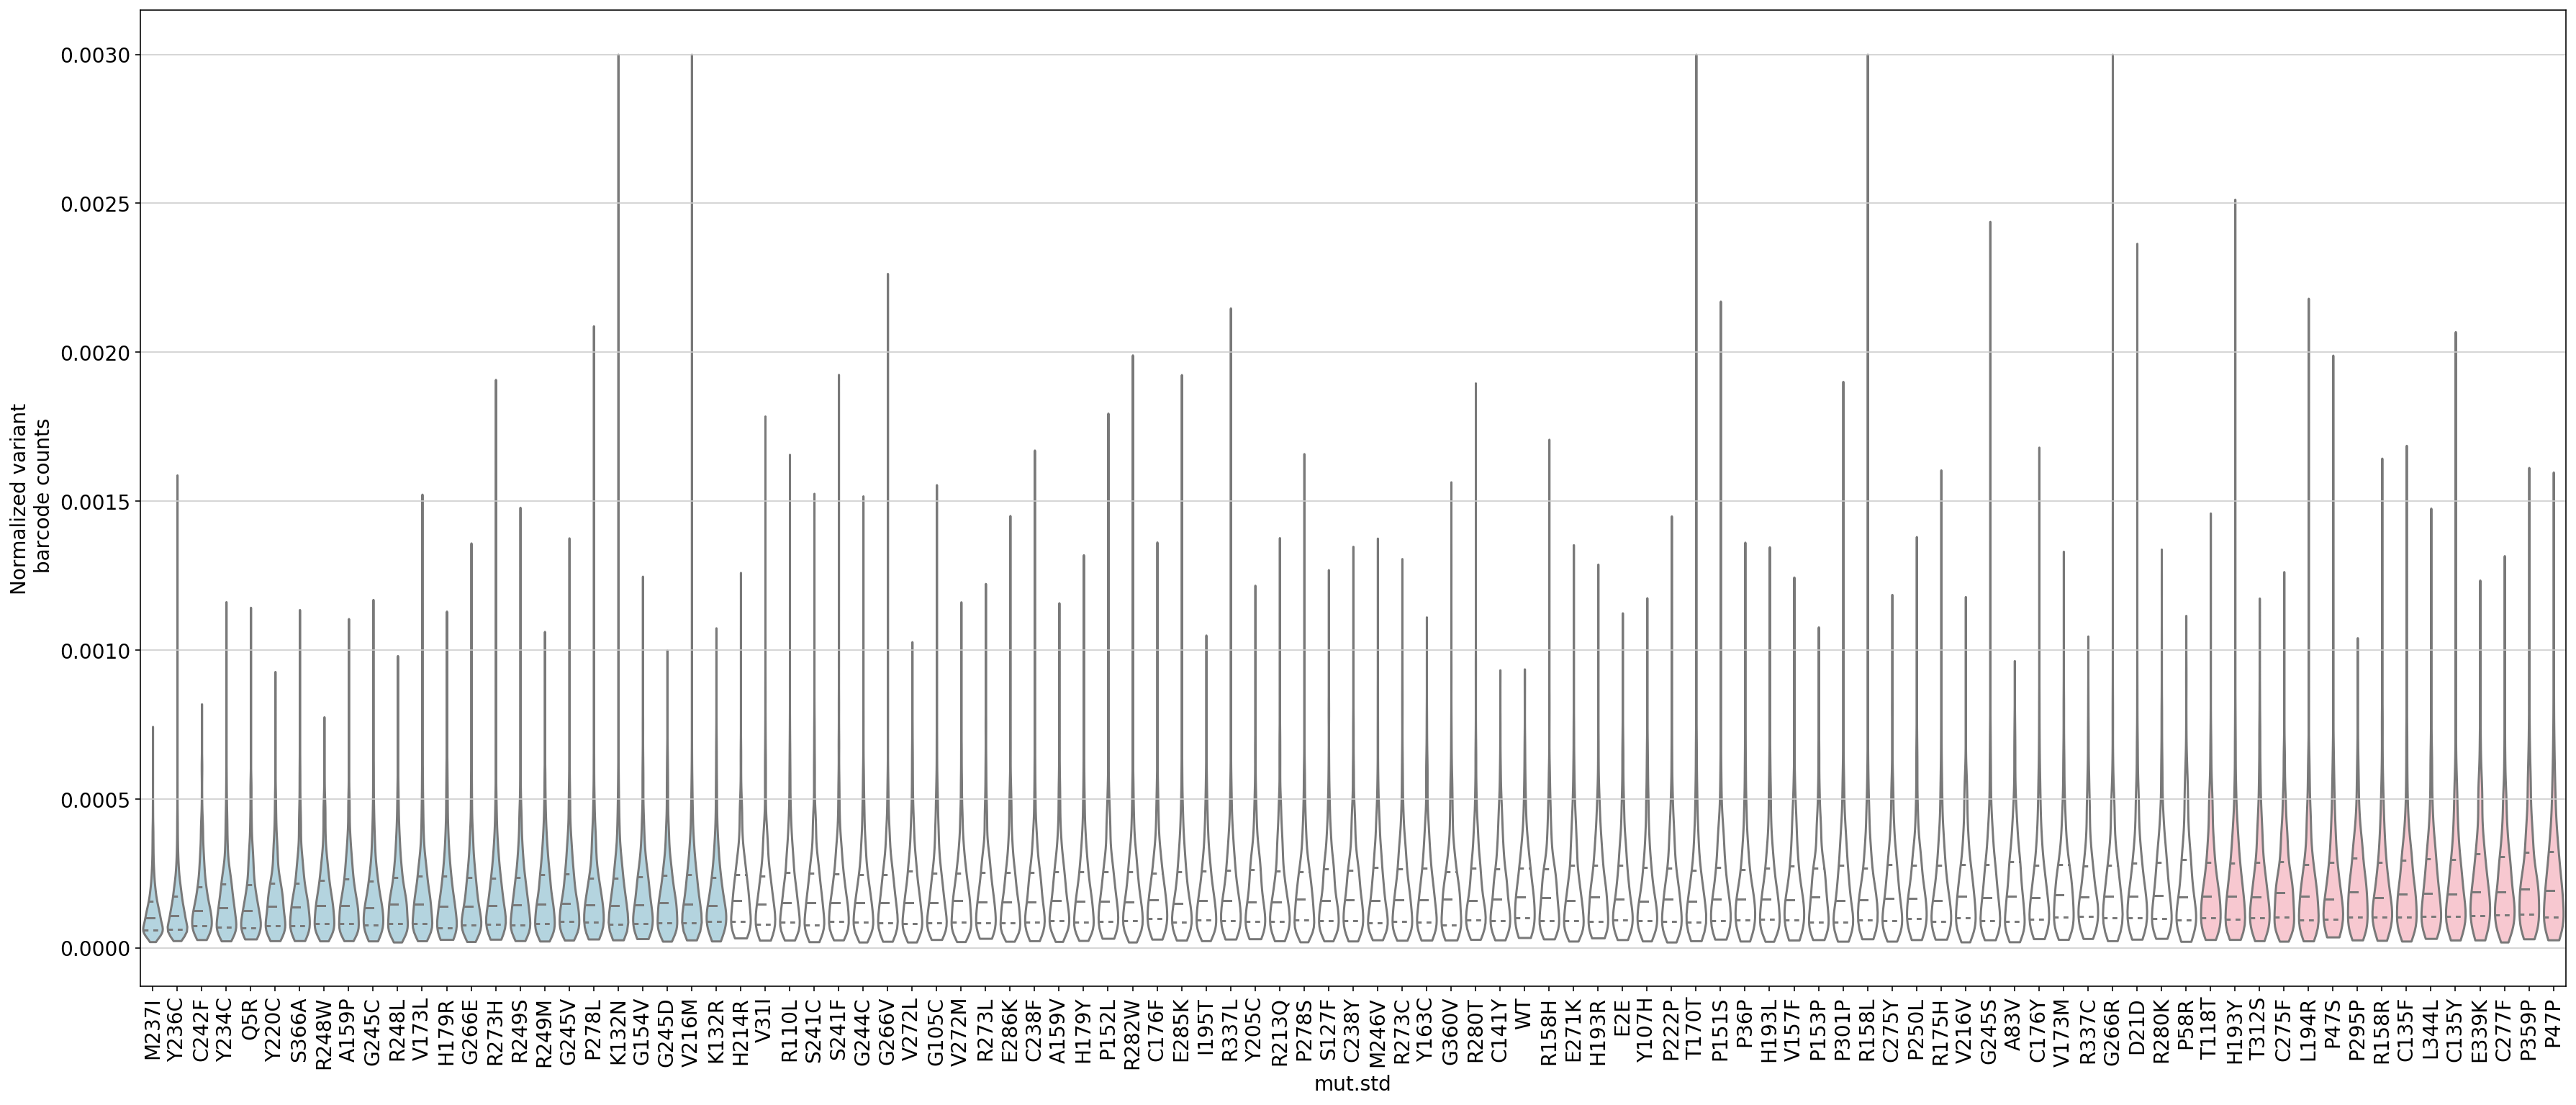

In [9]:
#subset to singly infected cells
keep=[]
for i in range(adata.shape[0]):
    m=adata.obs['mutant'][i]
    if m not in ['uninfected','multiple']:
        keep.append(i)
adata_single=adata[keep,:]
adata_single

#make a variable with the counts per variant
counts_per_v=[]
for i in range(adata_single.shape[0]):
    m=adata_single.obs['mutant'][i]
    count_current=adata_single.obs[m][i]
    counts_per_v.append(count_current)
adata_single.obs['counts_per_variant']=counts_per_v

#divide by n_counts (not downsampled)
vbc_counts=pd.DataFrame({'mut.std':adata_single.obs['mut.std'],
                        'vbc_count':adata_single.obs['counts_per_variant'],
                        'counts_original':adata_single.obs['n_counts_original']})
vbc_counts['vbc_norm_counts']=vbc_counts['vbc_count']/vbc_counts['counts_original']

#do DE test to find sig different ones
from scipy import stats

fdr=0.1

de_vbc=pd.DataFrame({'variant':list(set(vbc_counts['mut.std'])),
                    'p':-1,
                    'sign':1,
                    'lfc':0})
for v in de_vbc['variant']:
    v_values=vbc_counts.loc[vbc_counts['mut.std']==v,'vbc_norm_counts']
    wt_values=vbc_counts.loc[vbc_counts['mut.std']=='WT','vbc_norm_counts']
    lfc=np.log2(np.mean(v_values)/np.mean(wt_values))
    ttest_out=stats.ttest_ind(v_values,wt_values, equal_var = False)
    p=ttest_out[1]
    de_vbc.loc[de_vbc['variant']==v,'p']=p
    de_vbc.loc[de_vbc['variant']==v,'sign']=np.sign(ttest_out[0])
    de_vbc.loc[de_vbc['variant']==v,'lfc']=lfc
    
de_vbc=de_vbc.sort_values(by='p')
from statsmodels.stats.multitest import multipletests
de_vbc['p.bh']=multipletests(de_vbc['p'], alpha=0.05, method='fdr_bh')[1]
de_vbc['signed_minuslogp.bh']=-de_vbc['sign']*np.log10(de_vbc['p.bh'])
print(de_vbc.loc[de_vbc['p.bh']<fdr,:])
de_vbc=de_vbc.sort_values(by='signed_minuslogp.bh',ascending=True)

plt.hist(de_vbc['lfc'])
plt.show()

color_dict={}
for i in range(de_vbc.shape[0]):
    mut=de_vbc.iloc[i,0]
    pbh=de_vbc.iloc[i,1]
    direction=de_vbc.iloc[i,2]
    val=-np.log10(pbh)
    x=30
    if direction>0:
        col=(max(0,1-0.75*val/x),max(0,1-val/x),max(0,1-val/x))
        col='pink'
    else:
        col=(max(0,1-val/x),max(0,1-val/x),max(0,1-0.55*val/x))
        col='lightblue'
    if pbh>fdr:
        col='white'
    #if mut=='WT':
    #    col='yellow'
    color_dict[mut]=col

vbc_counts['Normalized variant\n barcode counts']=vbc_counts['vbc_norm_counts']

vbc_counts_clip=copy.deepcopy(vbc_counts)
vbc_counts_clip['Normalized variant\n barcode counts'][vbc_counts_clip['Normalized variant\n barcode counts']>0.003]=0.003
sorted_catplot_given_order(vbc_counts_clip,'mut.std','Normalized variant\n barcode counts',
                           list(de_vbc['variant']),
                           'mut.std',
              color_dict,figwidth=30,figheight=12)

remember_de_vbc=de_vbc

   variant             p  sign          p.bh  signed_minuslogp.bh
12   M237I  2.180748e-12  -1.0  2.158940e-10            -9.665759
30   Y236C  1.238036e-10  -1.0  6.128278e-09            -8.212662
62   C242F  5.079555e-06  -1.0  1.676253e-04            -3.775660
28   S366A  2.107166e-05  -1.0  5.215237e-04            -3.282726
9    P359P  4.468271e-04   1.0  8.847176e-03             2.053195
49   Y234C  8.242448e-04  -1.0  1.263728e-02            -1.898346
69   G266E  8.935453e-04  -1.0  1.263728e-02            -1.898346
70   Y220C  1.101406e-03  -1.0  1.362989e-02            -1.865507
34   A159P  3.074236e-03  -1.0  3.329743e-02            -1.477589
71     Q5R  3.564332e-03  -1.0  3.329743e-02            -1.477589
64   V173L  3.699715e-03  -1.0  3.329743e-02            -1.477589
57   G245D  6.141490e-03  -1.0  4.580172e-02            -1.339118
15   R249S  6.228352e-03  -1.0  4.580172e-02            -1.339118
39   R248W  7.174179e-03  -1.0  4.580172e-02            -1.339118
1    P278L

/ahg/regevdata/users/oursu/software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


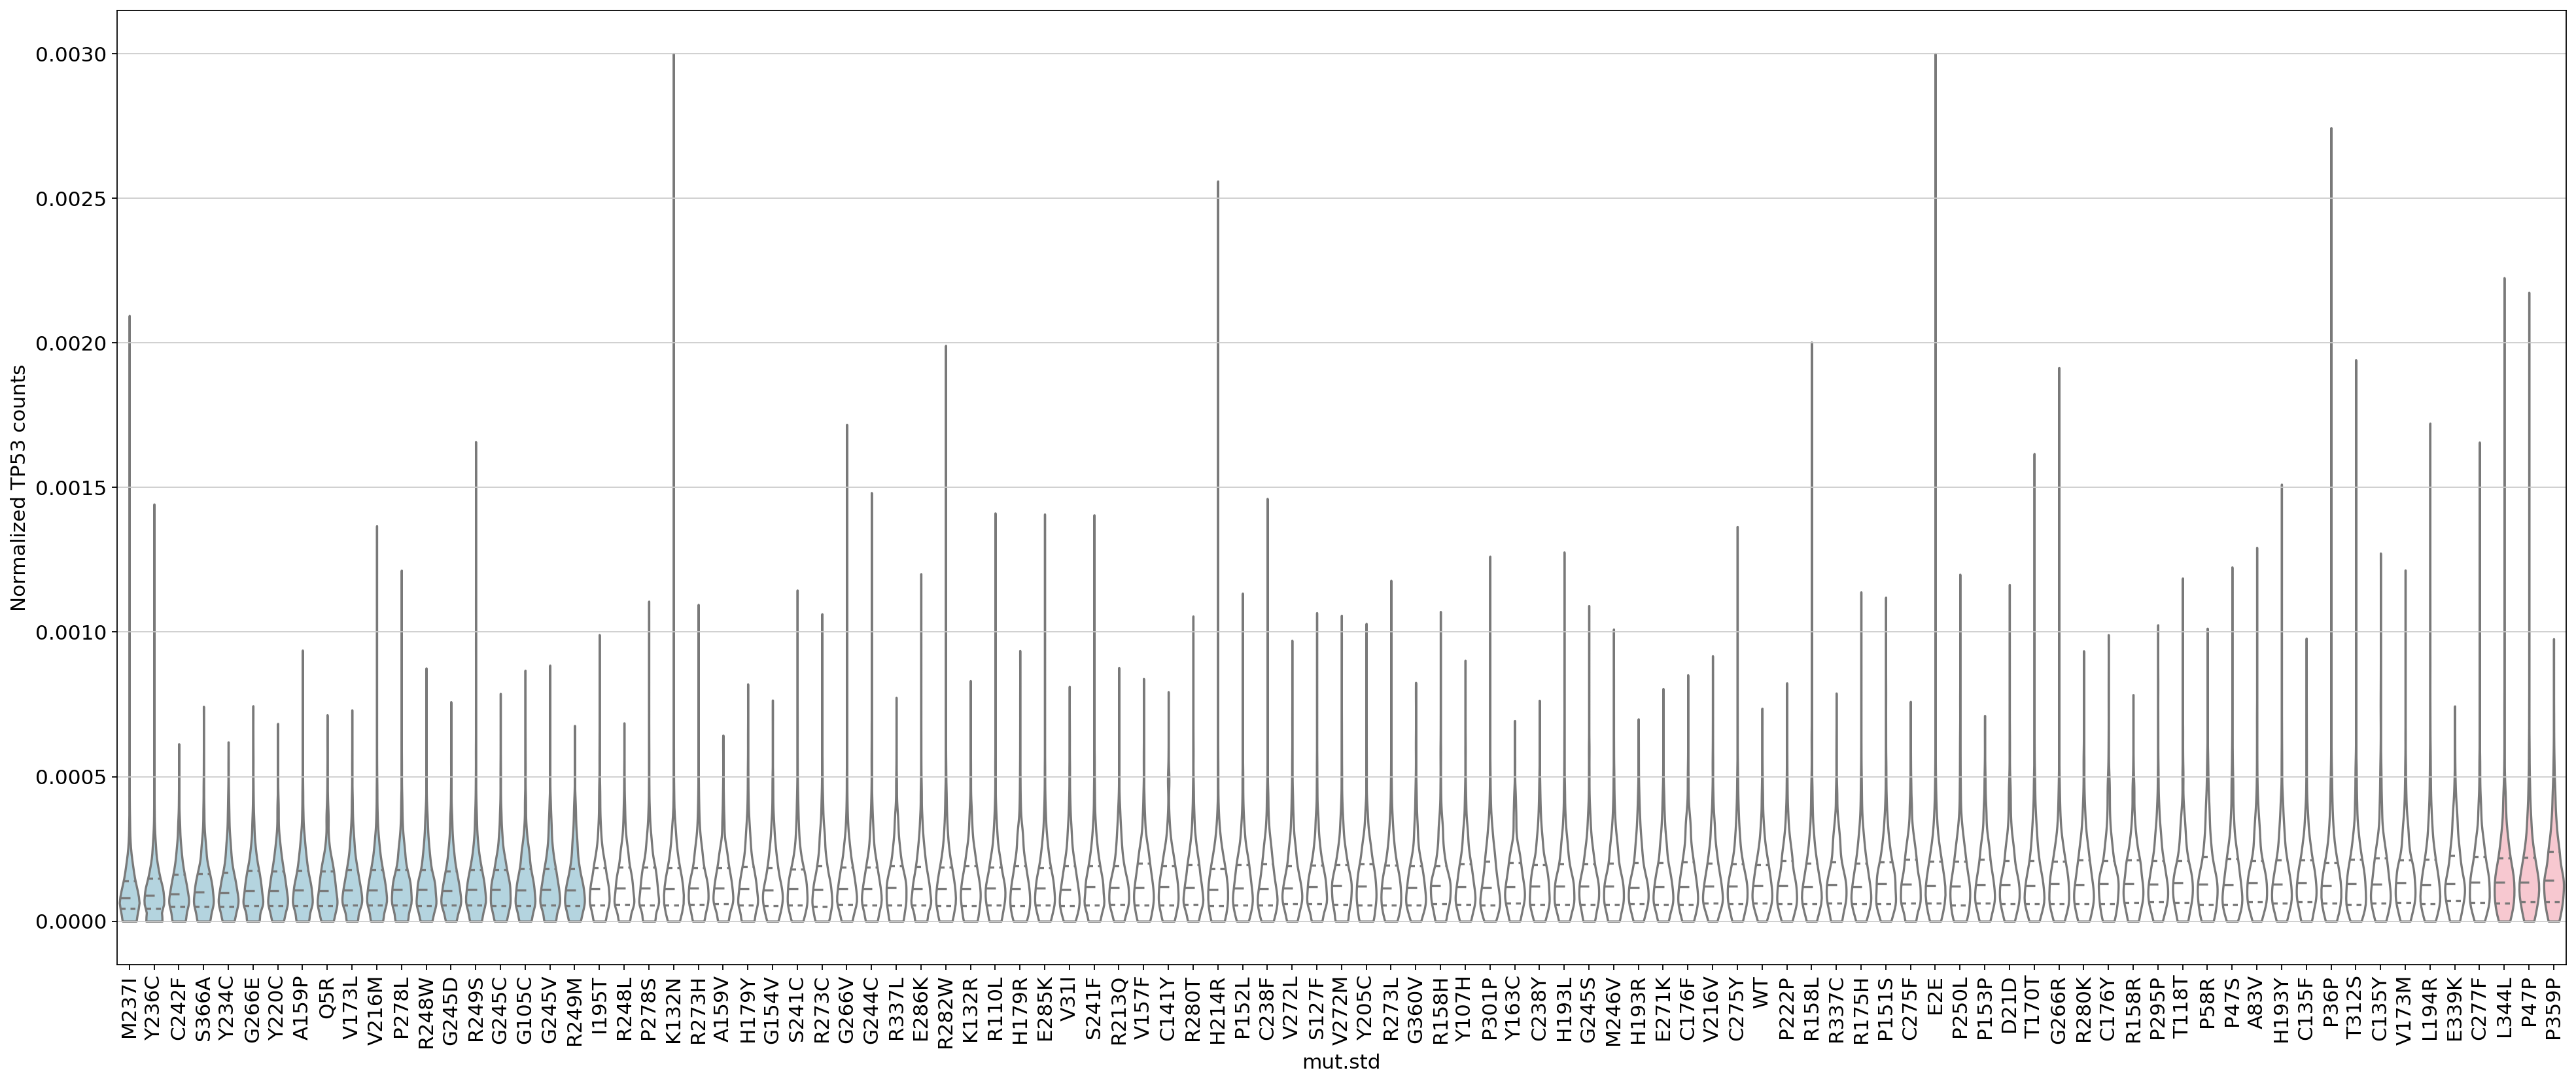

In [48]:
#look at the endogenous locus as well
#divide by n_counts (not downsampled)
vbc_counts=pd.DataFrame({'mut.std':adata_single.obs['mut.std'],
                        'count':adata_single[:,PROTEIN].X.toarray().flatten(),
                        'counts_original':adata_single.obs['n_counts_original']})
vbc_counts['norm_counts']=vbc_counts['count']/vbc_counts['counts_original']

#do DE test to find sig different ones
from scipy import stats

fdr=0.05

de_vbc=pd.DataFrame({'variant':list(set(vbc_counts['mut.std'])),
                    'p':-1,
                    'sign':1})
for v in de_vbc['variant']:
    v_values=vbc_counts.loc[vbc_counts['mut.std']==v,'norm_counts']
    wt_values=vbc_counts.loc[vbc_counts['mut.std']=='WT','norm_counts']
    ttest_out=stats.ttest_ind(v_values,wt_values, equal_var = False)
    p=ttest_out[1]
    de_vbc.loc[de_vbc['variant']==v,'p']=p
    de_vbc.loc[de_vbc['variant']==v,'sign']=np.sign(ttest_out[0])
    
de_vbc=de_vbc.sort_values(by='p')
from statsmodels.stats.multitest import multipletests
de_vbc['p.bh']=multipletests(de_vbc['p'], alpha=0.05, method='fdr_bh')[1]
de_vbc['signed_minuslogp.bh']=-de_vbc['sign']*np.log10(de_vbc['p.bh'])
print(de_vbc.loc[de_vbc['p.bh']<fdr,:])
de_vbc=de_vbc.sort_values(by='signed_minuslogp.bh',ascending=True)

color_dict={}
for i in range(de_vbc.shape[0]):
    mut=de_vbc.iloc[i,0]
    pbh=de_vbc.iloc[i,1]
    direction=de_vbc.iloc[i,2]
    val=-np.log10(pbh)
    x=30
    if direction>0:
        col=(max(0,1-0.75*val/x),max(0,1-val/x),max(0,1-val/x))
        col='pink'
    else:
        col=(max(0,1-val/x),max(0,1-val/x),max(0,1-0.55*val/x))
        col='lightblue'
    if pbh>fdr:
        col='white'
    #if mut=='WT':
    #    col='yellow'
    color_dict[mut]=col

vbc_counts['Normalized '+PROTEIN+' counts']=vbc_counts['norm_counts']

vbc_counts_clip=copy.deepcopy(vbc_counts)
vbc_counts_clip['Normalized '+PROTEIN+' counts'][vbc_counts_clip['Normalized '+PROTEIN+' counts']>0.003]=0.003
sorted_catplot_given_order(vbc_counts_clip,'mut.std','Normalized '+PROTEIN+' counts',
                           list(de_vbc['variant']),
                           'mut.std',
              color_dict,figwidth=30,figheight=12)




In [49]:
remember_de_protein=de_vbc

remember_de_protein.index=remember_de_protein['variant']
remember_de_vbc.index=remember_de_vbc['variant']


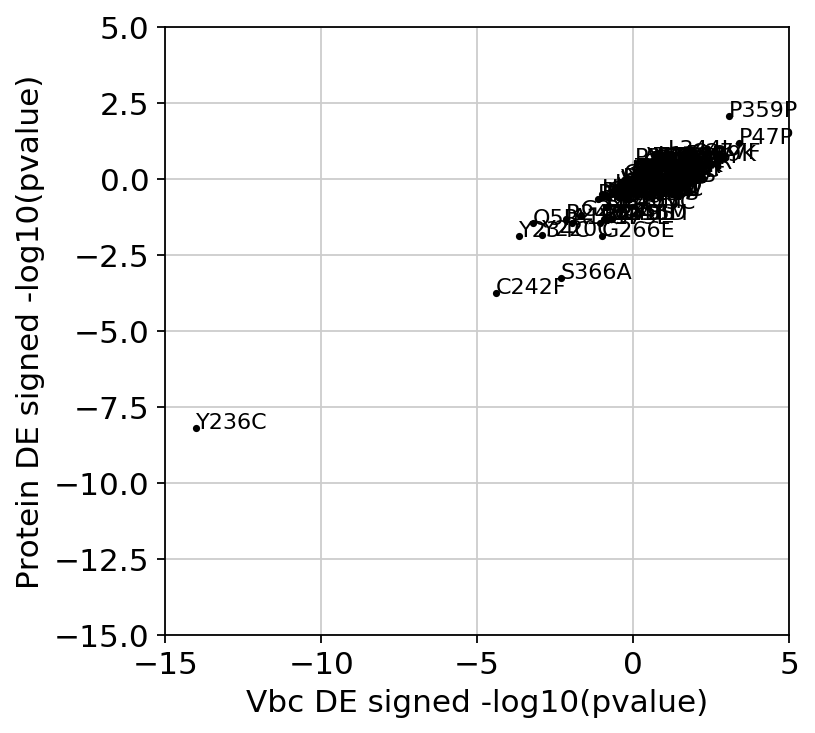

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
ax.scatter(remember_de_vbc['signed_minuslogp.bh'],
           remember_de_protein.loc[remember_de_vbc.index,'signed_minuslogp.bh'],
           color='black',s=5)
ax.set_xlabel('Vbc DE signed -log10(pvalue)')
ax.set_ylabel('Protein DE signed -log10(pvalue)')
ax.set_xlim(-15,5)
ax.set_ylim(-15,5)
for i, txt in enumerate(remember_de_vbc['variant']):
    ax.annotate(txt, (remember_de_vbc['signed_minuslogp.bh'][i], 
                      remember_de_protein.loc[remember_de_vbc.index,'signed_minuslogp.bh'][i]),
               fontsize=10)

Processing
==

In [5]:
adata=sc.read(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.h5ad')
adata

Only considering the two last: ['.counts_per_cell20000', '.h5ad'].
Only considering the two last: ['.counts_per_cell20000', '.h5ad'].


AnnData object with n_obs × n_vars = 162314 × 24839 
    obs: 'TP53_A159P', 'TP53_A159V', 'TP53_C135F', 'TP53_C135Y', 'TP53_C141Y', 'TP53_C176F', 'TP53_C176Y', 'TP53_C238F', 'TP53_C238Y', 'TP53_C242F', 'TP53_C275F', 'TP53_C275Y', 'TP53_C277F', 'TP53_E271K', 'TP53_E285K', 'TP53_E286K', 'TP53_G105C', 'TP53_G154V', 'TP53_G244C', 'TP53_G245C', 'TP53_G245D', 'TP53_G245S', 'TP53_G245V', 'TP53_G266E', 'TP53_G266R', 'TP53_G266V', 'TP53_H179R', 'TP53_H179Y', 'TP53_H193L', 'TP53_H193R', 'TP53_H193Y', 'TP53_H214R', 'TP53_I195T', 'TP53_K132N', 'TP53_K132R', 'TP53_L194R', 'TP53_M237I', 'TP53_M246V', 'TP53_P151S', 'TP53_P152L', 'TP53_P250L', 'TP53_P278L', 'TP53_P278S', 'TP53_R110L', 'TP53_R158H', 'TP53_R158L', 'TP53_R175H', 'TP53_R213Q', 'TP53_R248L', 'TP53_R248W', 'TP53_R249M', 'TP53_R249S', 'TP53_R273C', 'TP53_R273H', 'TP53_R273L', 'TP53_R280K', 'TP53_R280T', 'TP53_R282W', 'TP53_R337C', 'TP53_R337L', 'TP53_S127F', 'TP53_S241C', 'TP53_S241F', 'TP53_V157F', 'TP53_V173L', 'TP53_V173M', 'TP53_V216M', 

In [50]:
#adata=subsample_cells(adata,1000,'mutant')
#adata

In [6]:
#normalize
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
adata.raw = sc.pp.log1p(adata, copy=True)
sc.pp.log1p(adata)

normalizing by total count per cell
    finished (0:00:14): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [7]:
MIN_DISPERSION=0.5
sc.pp.highly_variable_genes(adata,
                            min_mean=0.0125, max_mean=4, 
                            min_disp=MIN_DISPERSION,flavor='seurat')

extracting highly variable genes
    finished (0:00:29)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [8]:
print(np.sum(1.0*np.array(adata.var['highly_variable'])))

1224.0


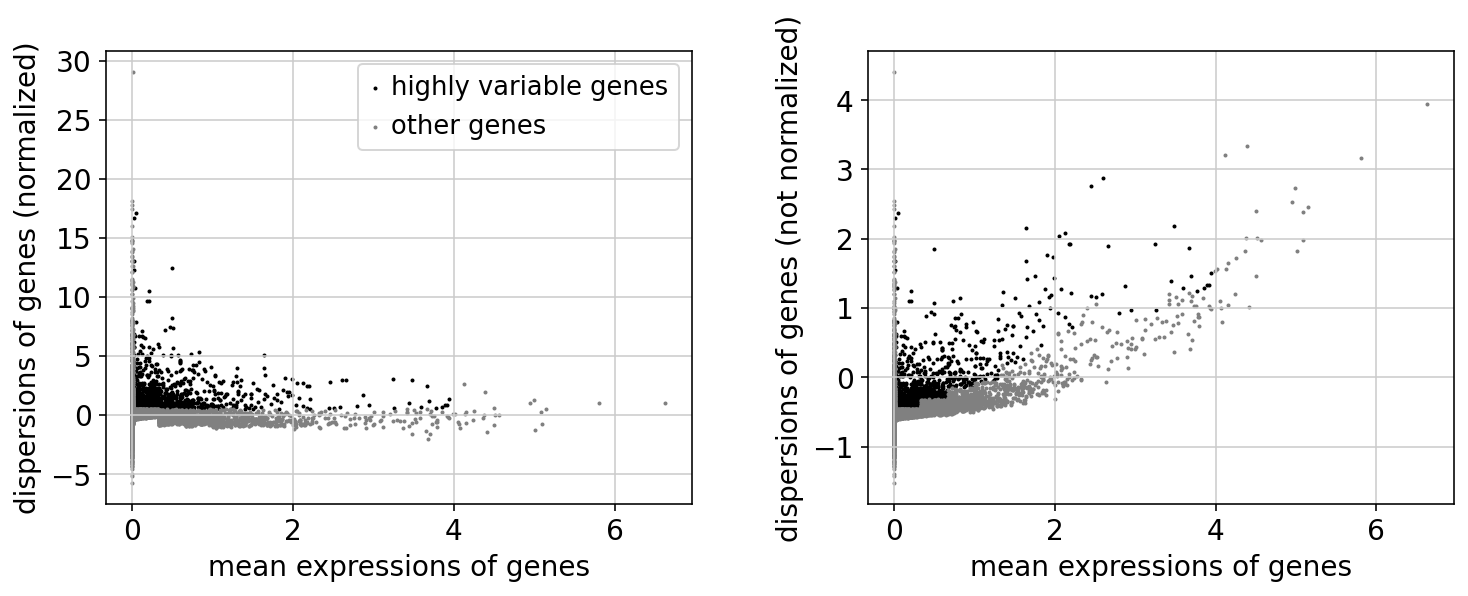

In [9]:
sc.pl.highly_variable_genes(adata)

In [10]:
adata = adata[:, adata.var['highly_variable']]
adata

View of AnnData object with n_obs × n_vars = 162314 × 1224 
    obs: 'TP53_A159P', 'TP53_A159V', 'TP53_C135F', 'TP53_C135Y', 'TP53_C141Y', 'TP53_C176F', 'TP53_C176Y', 'TP53_C238F', 'TP53_C238Y', 'TP53_C242F', 'TP53_C275F', 'TP53_C275Y', 'TP53_C277F', 'TP53_E271K', 'TP53_E285K', 'TP53_E286K', 'TP53_G105C', 'TP53_G154V', 'TP53_G244C', 'TP53_G245C', 'TP53_G245D', 'TP53_G245S', 'TP53_G245V', 'TP53_G266E', 'TP53_G266R', 'TP53_G266V', 'TP53_H179R', 'TP53_H179Y', 'TP53_H193L', 'TP53_H193R', 'TP53_H193Y', 'TP53_H214R', 'TP53_I195T', 'TP53_K132N', 'TP53_K132R', 'TP53_L194R', 'TP53_M237I', 'TP53_M246V', 'TP53_P151S', 'TP53_P152L', 'TP53_P250L', 'TP53_P278L', 'TP53_P278S', 'TP53_R110L', 'TP53_R158H', 'TP53_R158L', 'TP53_R175H', 'TP53_R213Q', 'TP53_R248L', 'TP53_R248W', 'TP53_R249M', 'TP53_R249S', 'TP53_R273C', 'TP53_R273H', 'TP53_R273L', 'TP53_R280K', 'TP53_R280T', 'TP53_R282W', 'TP53_R337C', 'TP53_R337L', 'TP53_S127F', 'TP53_S241C', 'TP53_S241F', 'TP53_V157F', 'TP53_V173L', 'TP53_V173M', 'TP53_V

In [13]:
variants=['TP53_A159P', 'TP53_A159V', 'TP53_C135F', 'TP53_C135Y', 'TP53_C141Y', 'TP53_C176F', 'TP53_C176Y', 'TP53_C238F', 'TP53_C238Y', 'TP53_C242F', 'TP53_C275F', 'TP53_C275Y', 'TP53_C277F', 'TP53_E271K', 'TP53_E285K', 'TP53_E286K', 'TP53_G105C', 'TP53_G154V', 'TP53_G244C', 'TP53_G245C', 'TP53_G245D', 'TP53_G245S', 'TP53_G245V', 'TP53_G266E', 'TP53_G266R', 'TP53_G266V', 'TP53_H179R', 'TP53_H179Y', 'TP53_H193L', 'TP53_H193R', 'TP53_H193Y', 'TP53_H214R', 'TP53_I195T', 'TP53_K132N', 'TP53_K132R', 'TP53_L194R', 'TP53_M237I', 'TP53_M246V', 'TP53_P151S', 'TP53_P152L', 'TP53_P250L', 'TP53_P278L', 'TP53_P278S', 'TP53_R110L', 'TP53_R158H', 'TP53_R158L', 'TP53_R175H', 'TP53_R213Q', 'TP53_R248L', 'TP53_R248W', 'TP53_R249M', 'TP53_R249S', 'TP53_R273C', 'TP53_R273H', 'TP53_R273L', 'TP53_R280K', 'TP53_R280T', 'TP53_R282W', 'TP53_R337C', 'TP53_R337L', 'TP53_S127F', 'TP53_S241C', 'TP53_S241F', 'TP53_V157F', 'TP53_V173L', 'TP53_V173M', 'TP53_V216M', 'TP53_V272L', 'TP53_V272M', 'TP53_WT', 'TP53_Y163C', 'TP53_Y205C', 'TP53_Y220C', 'TP53_Y234C', 'TP53_Y236C', 'TP53_p.Al83Vl', 'TP53_p.Ar158Ar', 'TP53_p.Asp21Asp', 'TP53_p.Gln5Ar', 'TP53_p.Glu2Glu', 'TP53_p.Glu339Lys', 'TP53_p.Gly360Vl', 'TP53_p.Leu344Leu', 'TP53_p.Pro153Pro', 'TP53_p.Pro222Pro', 'TP53_p.Pro295Pro', 'TP53_p.Pro301Pro', 'TP53_p.Pro359Pro', 'TP53_p.Pro36Pro', 'TP53_p.Pro47Pro', 'TP53_p.Pro47Ser', 'TP53_p.Pro58Ar', 'TP53_p.Ser366Al', 'TP53_p.Thr118Thr', 'TP53_p.Thr170Thr', 'TP53_p.Thr312Ser', 'TP53_p.Tyr107His', 'TP53_p.Vl216Vl', 'TP53_p.Vl31Ile']

In [32]:
#annotate the expression of the variant barcode

#make a variable with the counts per variant
counts_per_v=np.array(adata.obs[variants]).sum(axis=1)
vbc_counts=pd.DataFrame({'mut.std':adata.obs['mut.std'],
                        'vbc_count':counts_per_v,
                        'counts_original':adata.obs['n_counts_original']})
vbc_counts['vbc_norm_counts']=vbc_counts['vbc_count']/vbc_counts['counts_original']

In [35]:
adata.obs['vbc.counts']=vbc_counts['vbc_norm_counts']

In [36]:
#batch correct
to_regress_out=[]
for batch in set(adata.obs['batch']):
    batch_vector=np.zeros((1,len(adata.obs_names)))
    for cell_idx in range(len(adata.obs_names)):
        if adata.obs['batch'][cell_idx]==batch:
            batch_vector[0,cell_idx]=1.0
    batchname='batch_num'+batch
    adata.obs[batchname]=batch_vector[0,:]
    to_regress_out.append(batchname)

#add total counts and percent mito to the stuff to regress out
#also regress out the vbc
to_regress_out.append('n_counts')
to_regress_out.append('percent_mito')
to_regress_out.append('vbc.counts')
sc.pp.regress_out(adata,to_regress_out)


regressing out ['batch_num18', 'batch_num8', 'batch_num25', 'batch_num22', 'batch_num24', 'batch_num28', 'batch_num27', 'batch_num23', 'batch_num17', 'batch_num19', 'batch_num12', 'batch_num31', 'batch_num5', 'batch_num15', 'batch_num7', 'batch_num9', 'batch_num4', 'batch_num2', 'batch_num13', 'batch_num6', 'batch_num26', 'batch_num16', 'batch_num10', 'batch_num1', 'batch_num29', 'batch_num0', 'batch_num11', 'batch_num30', 'batch_num3', 'batch_num14', 'batch_num21', 'batch_num20', 'n_counts', 'percent_mito', 'vbc.counts']
    sparse input is densified and may lead to high memory use
    finished (1:17:13)


In [37]:
adata.write(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.batch_regressed.regress_out_vbc.h5ad')

In [38]:
adata=sc.read(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.batch_regressed.regress_out_vbc.h5ad')
adata

Only considering the two last: ['.regress_out_vbc', '.h5ad'].
Only considering the two last: ['.regress_out_vbc', '.h5ad'].


AnnData object with n_obs × n_vars = 162314 × 1224 
    obs: 'TP53_A159P', 'TP53_A159V', 'TP53_C135F', 'TP53_C135Y', 'TP53_C141Y', 'TP53_C176F', 'TP53_C176Y', 'TP53_C238F', 'TP53_C238Y', 'TP53_C242F', 'TP53_C275F', 'TP53_C275Y', 'TP53_C277F', 'TP53_E271K', 'TP53_E285K', 'TP53_E286K', 'TP53_G105C', 'TP53_G154V', 'TP53_G244C', 'TP53_G245C', 'TP53_G245D', 'TP53_G245S', 'TP53_G245V', 'TP53_G266E', 'TP53_G266R', 'TP53_G266V', 'TP53_H179R', 'TP53_H179Y', 'TP53_H193L', 'TP53_H193R', 'TP53_H193Y', 'TP53_H214R', 'TP53_I195T', 'TP53_K132N', 'TP53_K132R', 'TP53_L194R', 'TP53_M237I', 'TP53_M246V', 'TP53_P151S', 'TP53_P152L', 'TP53_P250L', 'TP53_P278L', 'TP53_P278S', 'TP53_R110L', 'TP53_R158H', 'TP53_R158L', 'TP53_R175H', 'TP53_R213Q', 'TP53_R248L', 'TP53_R248W', 'TP53_R249M', 'TP53_R249S', 'TP53_R273C', 'TP53_R273H', 'TP53_R273L', 'TP53_R280K', 'TP53_R280T', 'TP53_R282W', 'TP53_R337C', 'TP53_R337L', 'TP53_S127F', 'TP53_S241C', 'TP53_S241F', 'TP53_V157F', 'TP53_V173L', 'TP53_V173M', 'TP53_V216M', '

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:55)


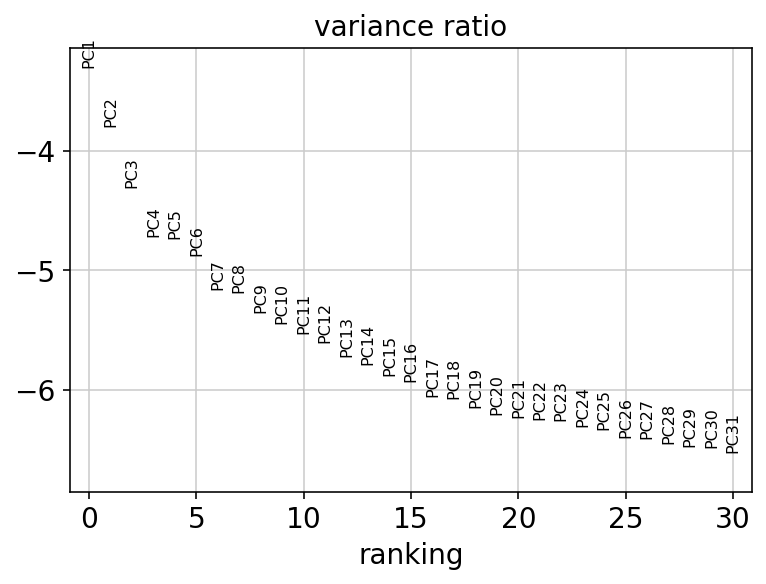

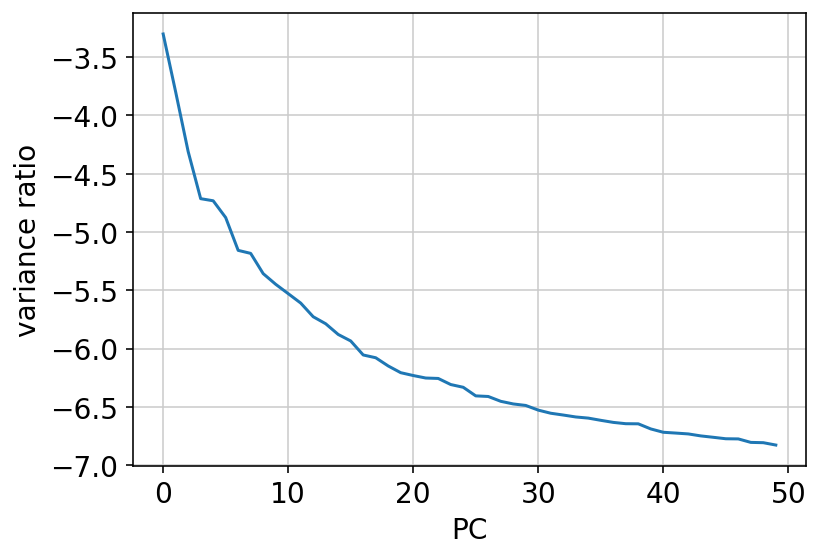

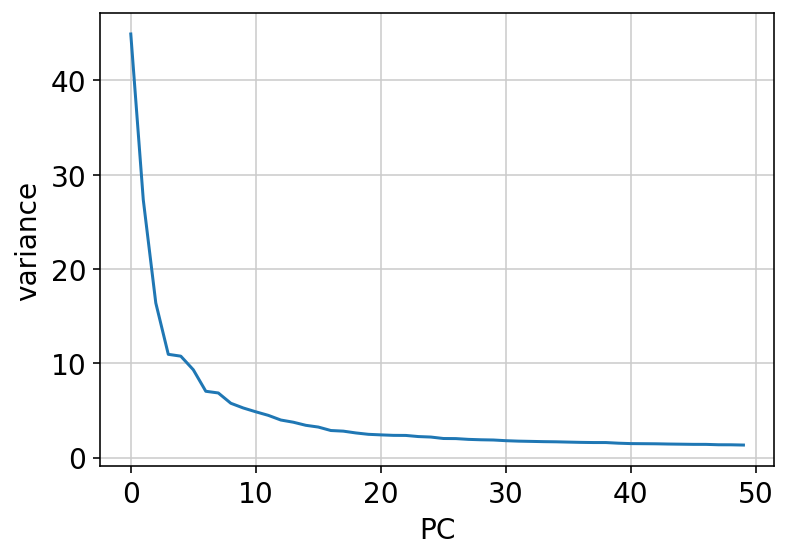

In [40]:
#zscores
sc.pp.scale(adata, max_value=10)

#PCs
sc.tl.pca(adata,svd_solver='arpack',n_comps=50)
adata.obsm['X_pca'] *= -1
sc.pl.pca_variance_ratio(adata, log=True)

plt.plot(np.log(adata.uns['pca']['variance_ratio']))
plt.xlabel('PC')
plt.ylabel('variance ratio')
plt.show()
plt.plot(adata.uns['pca']['variance'])
plt.xlabel('PC')
plt.ylabel('variance')
plt.show()

In [ ]:
sc.pp.neighbors(adata, n_neighbors=15) #15 neighbors is default
sc.tl.louvain(adata)

In [42]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:07:41)


sc.pl.umap(adata,color=['louvain'])
sc.pl.umap(adata,color=['known'],groups=['Loss-of-function'])

In [46]:
adata

AnnData object with n_obs × n_vars = 162314 × 1224 
    obs: 'TP53_A159P', 'TP53_A159V', 'TP53_C135F', 'TP53_C135Y', 'TP53_C141Y', 'TP53_C176F', 'TP53_C176Y', 'TP53_C238F', 'TP53_C238Y', 'TP53_C242F', 'TP53_C275F', 'TP53_C275Y', 'TP53_C277F', 'TP53_E271K', 'TP53_E285K', 'TP53_E286K', 'TP53_G105C', 'TP53_G154V', 'TP53_G244C', 'TP53_G245C', 'TP53_G245D', 'TP53_G245S', 'TP53_G245V', 'TP53_G266E', 'TP53_G266R', 'TP53_G266V', 'TP53_H179R', 'TP53_H179Y', 'TP53_H193L', 'TP53_H193R', 'TP53_H193Y', 'TP53_H214R', 'TP53_I195T', 'TP53_K132N', 'TP53_K132R', 'TP53_L194R', 'TP53_M237I', 'TP53_M246V', 'TP53_P151S', 'TP53_P152L', 'TP53_P250L', 'TP53_P278L', 'TP53_P278S', 'TP53_R110L', 'TP53_R158H', 'TP53_R158L', 'TP53_R175H', 'TP53_R213Q', 'TP53_R248L', 'TP53_R248W', 'TP53_R249M', 'TP53_R249S', 'TP53_R273C', 'TP53_R273H', 'TP53_R273L', 'TP53_R280K', 'TP53_R280T', 'TP53_R282W', 'TP53_R337C', 'TP53_R337L', 'TP53_S127F', 'TP53_S241C', 'TP53_S241F', 'TP53_V157F', 'TP53_V173L', 'TP53_V173M', 'TP53_V216M', '

In [47]:
import perturbseq as perturb
adata2=perturb.pp.subsample_cells(adata,100,'mut.std')
adata2

View of AnnData object with n_obs × n_vars = 10100 × 1224 
    obs: 'TP53_A159P', 'TP53_A159V', 'TP53_C135F', 'TP53_C135Y', 'TP53_C141Y', 'TP53_C176F', 'TP53_C176Y', 'TP53_C238F', 'TP53_C238Y', 'TP53_C242F', 'TP53_C275F', 'TP53_C275Y', 'TP53_C277F', 'TP53_E271K', 'TP53_E285K', 'TP53_E286K', 'TP53_G105C', 'TP53_G154V', 'TP53_G244C', 'TP53_G245C', 'TP53_G245D', 'TP53_G245S', 'TP53_G245V', 'TP53_G266E', 'TP53_G266R', 'TP53_G266V', 'TP53_H179R', 'TP53_H179Y', 'TP53_H193L', 'TP53_H193R', 'TP53_H193Y', 'TP53_H214R', 'TP53_I195T', 'TP53_K132N', 'TP53_K132R', 'TP53_L194R', 'TP53_M237I', 'TP53_M246V', 'TP53_P151S', 'TP53_P152L', 'TP53_P250L', 'TP53_P278L', 'TP53_P278S', 'TP53_R110L', 'TP53_R158H', 'TP53_R158L', 'TP53_R175H', 'TP53_R213Q', 'TP53_R248L', 'TP53_R248W', 'TP53_R249M', 'TP53_R249S', 'TP53_R273C', 'TP53_R273H', 'TP53_R273L', 'TP53_R280K', 'TP53_R280T', 'TP53_R282W', 'TP53_R337C', 'TP53_R337L', 'TP53_S127F', 'TP53_S241C', 'TP53_S241F', 'TP53_V157F', 'TP53_V173L', 'TP53_V173M', 'TP53_V2

In [48]:
adata2

View of AnnData object with n_obs × n_vars = 10100 × 1224 
    obs: 'TP53_A159P', 'TP53_A159V', 'TP53_C135F', 'TP53_C135Y', 'TP53_C141Y', 'TP53_C176F', 'TP53_C176Y', 'TP53_C238F', 'TP53_C238Y', 'TP53_C242F', 'TP53_C275F', 'TP53_C275Y', 'TP53_C277F', 'TP53_E271K', 'TP53_E285K', 'TP53_E286K', 'TP53_G105C', 'TP53_G154V', 'TP53_G244C', 'TP53_G245C', 'TP53_G245D', 'TP53_G245S', 'TP53_G245V', 'TP53_G266E', 'TP53_G266R', 'TP53_G266V', 'TP53_H179R', 'TP53_H179Y', 'TP53_H193L', 'TP53_H193R', 'TP53_H193Y', 'TP53_H214R', 'TP53_I195T', 'TP53_K132N', 'TP53_K132R', 'TP53_L194R', 'TP53_M237I', 'TP53_M246V', 'TP53_P151S', 'TP53_P152L', 'TP53_P250L', 'TP53_P278L', 'TP53_P278S', 'TP53_R110L', 'TP53_R158H', 'TP53_R158L', 'TP53_R175H', 'TP53_R213Q', 'TP53_R248L', 'TP53_R248W', 'TP53_R249M', 'TP53_R249S', 'TP53_R273C', 'TP53_R273H', 'TP53_R273L', 'TP53_R280K', 'TP53_R280T', 'TP53_R282W', 'TP53_R337C', 'TP53_R337L', 'TP53_S127F', 'TP53_S241C', 'TP53_S241F', 'TP53_V157F', 'TP53_V173L', 'TP53_V173M', 'TP53_V2

In [43]:
adata.write(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.regress_out_vbc.analysis.h5ad')

In [45]:
#quickly test the clustering using bulkification


from perturbseq.analysis import analyze_bulk_corr,build_bulk,get_corr_mat
from perturbseq.vis import cluster_matrix,plot_clustered_matrix,df_to_colors,get_figsize


%matplotlib inline
import matplotlib.pyplot as plt


corr=analyze_bulk_corr(adata,grouping_variable='mutant',label_variable='mutant',
                       by_batch=False,corr_type='spearman',fig_path='NA',vmin=-1,vmax=1,
                       figsize_multiplier=1.5)

ModuleNotFoundError: No module named 'perturbseq.analysis'

In [24]:
%run ./2020-02-13_utils.ipynb

scanpy==1.4.5.post1 anndata==0.7.1 umap==0.3.9 numpy==1.17.2 scipy==1.4.1 pandas==0.24.2 scikit-learn==0.22 statsmodels==0.11.0 python-igraph==0.7.1 louvain==0.6.1


In [25]:
adata

AnnData object with n_obs × n_vars = 162314 × 1224 
    obs: 'TP53_A159P', 'TP53_A159V', 'TP53_C135F', 'TP53_C135Y', 'TP53_C141Y', 'TP53_C176F', 'TP53_C176Y', 'TP53_C238F', 'TP53_C238Y', 'TP53_C242F', 'TP53_C275F', 'TP53_C275Y', 'TP53_C277F', 'TP53_E271K', 'TP53_E285K', 'TP53_E286K', 'TP53_G105C', 'TP53_G154V', 'TP53_G244C', 'TP53_G245C', 'TP53_G245D', 'TP53_G245S', 'TP53_G245V', 'TP53_G266E', 'TP53_G266R', 'TP53_G266V', 'TP53_H179R', 'TP53_H179Y', 'TP53_H193L', 'TP53_H193R', 'TP53_H193Y', 'TP53_H214R', 'TP53_I195T', 'TP53_K132N', 'TP53_K132R', 'TP53_L194R', 'TP53_M237I', 'TP53_M246V', 'TP53_P151S', 'TP53_P152L', 'TP53_P250L', 'TP53_P278L', 'TP53_P278S', 'TP53_R110L', 'TP53_R158H', 'TP53_R158L', 'TP53_R175H', 'TP53_R213Q', 'TP53_R248L', 'TP53_R248W', 'TP53_R249M', 'TP53_R249S', 'TP53_R273C', 'TP53_R273H', 'TP53_R273L', 'TP53_R280K', 'TP53_R280T', 'TP53_R282W', 'TP53_R337C', 'TP53_R337L', 'TP53_S127F', 'TP53_S241C', 'TP53_S241F', 'TP53_V157F', 'TP53_V173L', 'TP53_V173M', 'TP53_V216M', '

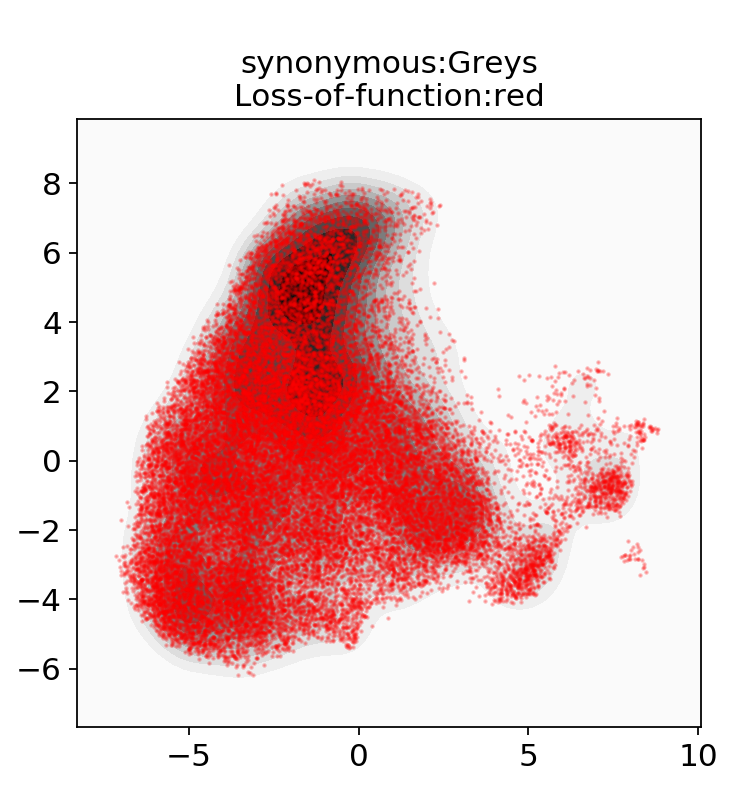

In [26]:
plot_multiple_densities(adata,'known',['synonymous','Loss-of-function'],
                        {'synonymous':'shade','Loss-of-function':'scatter'},
                        {'synonymous':'Greys','Loss-of-function':'red'},
                       scatter_s=1,scatter_alpha=0.25)

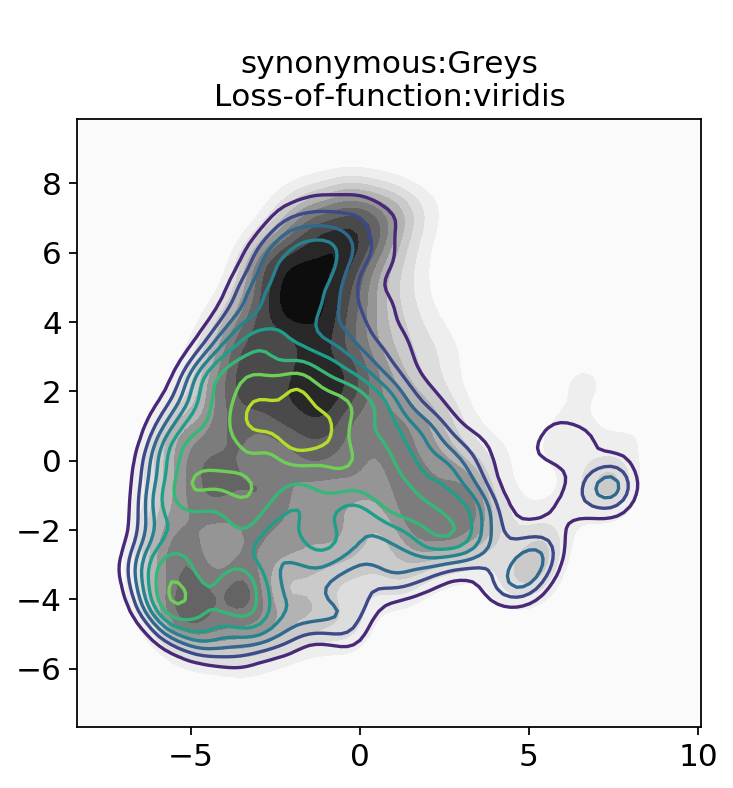

In [32]:
plot_multiple_densities(adata,'known',['synonymous','Loss-of-function'],
                        {'synonymous':'shade','Loss-of-function':'contour'},
                        {'synonymous':'Greys','Loss-of-function':'viridis'},
                       scatter_s=1,scatter_alpha=0.25)

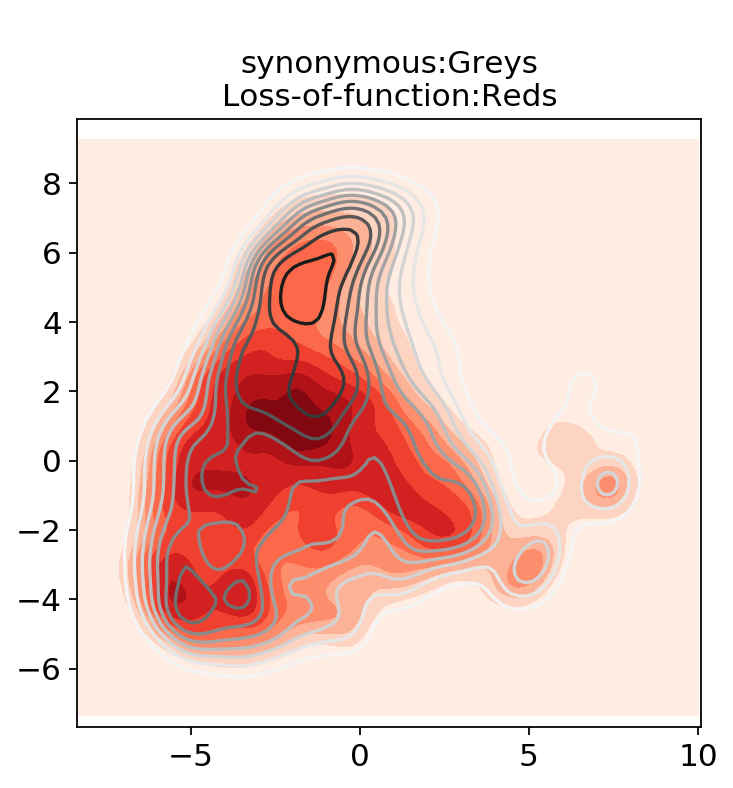

In [30]:
plot_multiple_densities(adata,'known',['synonymous','Loss-of-function'],
                        {'synonymous':'contour','Loss-of-function':'shade'},
                        {'synonymous':'Greys','Loss-of-function':'Reds'},
                       scatter_s=1,scatter_alpha=0.25)

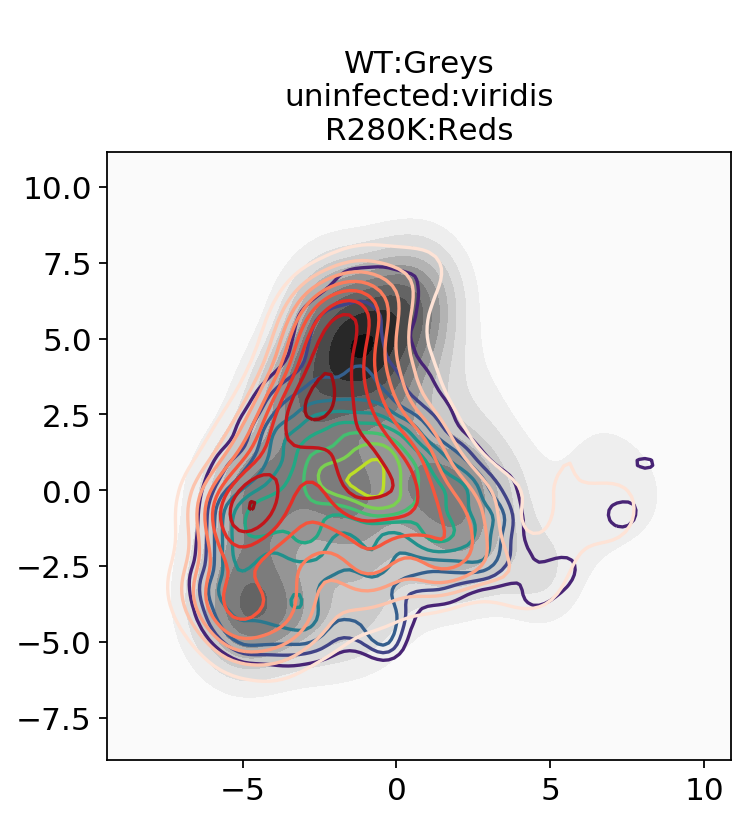

In [31]:
plot_multiple_densities(adata,'mut.std',['WT','uninfected','R280K'],
                        {'WT':'shade','uninfected':'contour','R280K':'contour'},
                        {'WT':'Greys','uninfected':'viridis','R280K':'Reds'})

In [5]:
adata=sc.read(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.analysis.h5ad')
adata

Only considering the two last: ['.analysis', '.h5ad'].
Only considering the two last: ['.analysis', '.h5ad'].


AnnData object with n_obs × n_vars = 162314 × 1224 
    obs: 'TP53_A159P', 'TP53_A159V', 'TP53_C135F', 'TP53_C135Y', 'TP53_C141Y', 'TP53_C176F', 'TP53_C176Y', 'TP53_C238F', 'TP53_C238Y', 'TP53_C242F', 'TP53_C275F', 'TP53_C275Y', 'TP53_C277F', 'TP53_E271K', 'TP53_E285K', 'TP53_E286K', 'TP53_G105C', 'TP53_G154V', 'TP53_G244C', 'TP53_G245C', 'TP53_G245D', 'TP53_G245S', 'TP53_G245V', 'TP53_G266E', 'TP53_G266R', 'TP53_G266V', 'TP53_H179R', 'TP53_H179Y', 'TP53_H193L', 'TP53_H193R', 'TP53_H193Y', 'TP53_H214R', 'TP53_I195T', 'TP53_K132N', 'TP53_K132R', 'TP53_L194R', 'TP53_M237I', 'TP53_M246V', 'TP53_P151S', 'TP53_P152L', 'TP53_P250L', 'TP53_P278L', 'TP53_P278S', 'TP53_R110L', 'TP53_R158H', 'TP53_R158L', 'TP53_R175H', 'TP53_R213Q', 'TP53_R248L', 'TP53_R248W', 'TP53_R249M', 'TP53_R249S', 'TP53_R273C', 'TP53_R273H', 'TP53_R273L', 'TP53_R280K', 'TP53_R280T', 'TP53_R282W', 'TP53_R337C', 'TP53_R337L', 'TP53_S127F', 'TP53_S241C', 'TP53_S241F', 'TP53_V157F', 'TP53_V173L', 'TP53_V173M', 'TP53_V216M', '

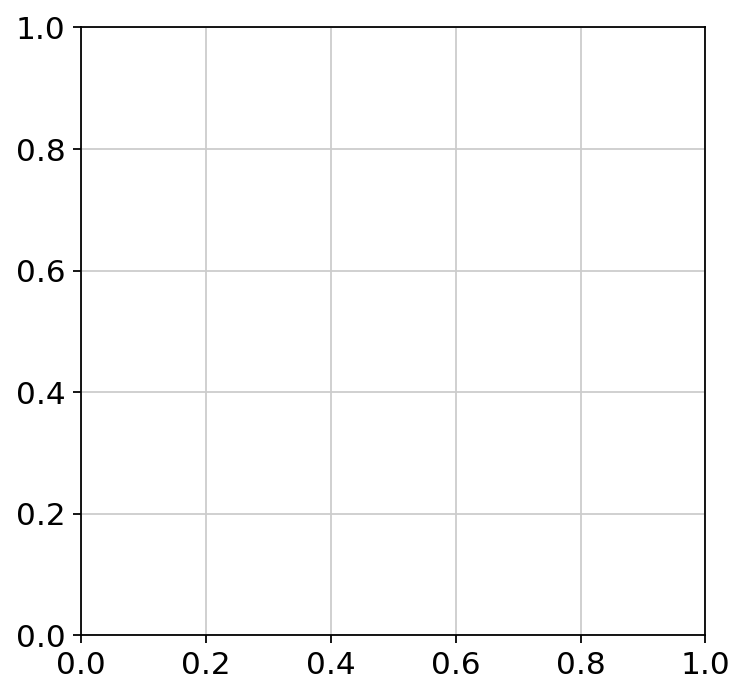

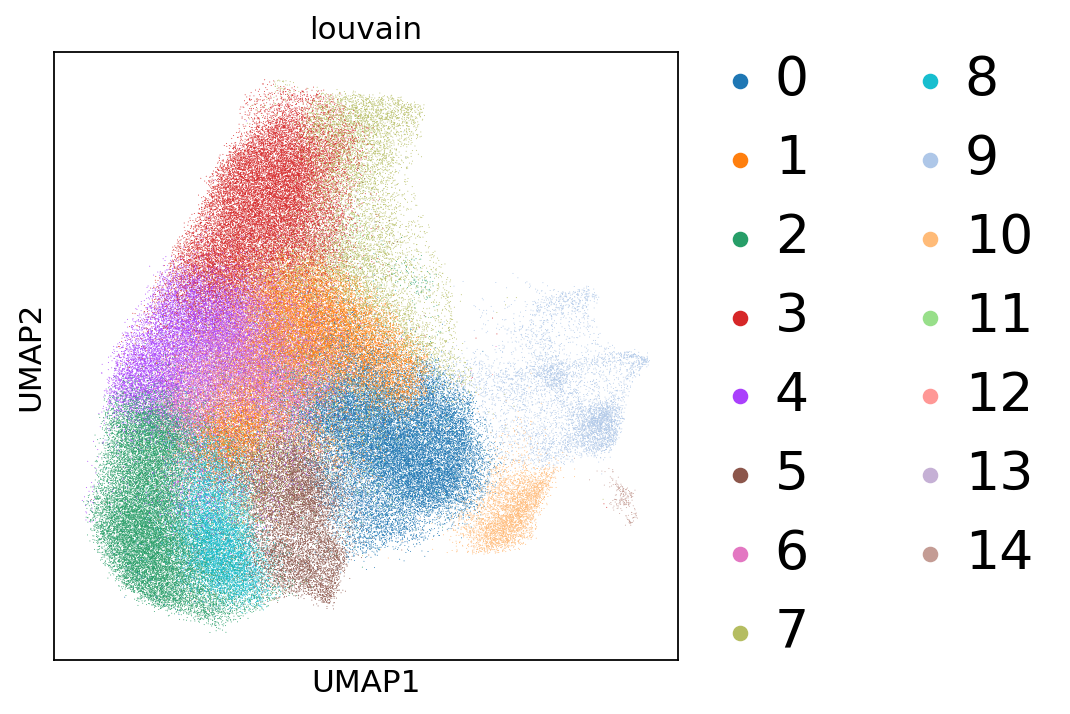

In [19]:
%matplotlib inline

fw=5
fh=5
sc.settings.set_figure_params(dpi=80, color_map='viridis',figsize=(fw,fh))
fig, plots = plt.subplots(1,1)
fig.set_size_inches(fw,fh)

plots=sc.pl.umap(adata,color=['louvain'],return_fig=True,legend_fontsize='xx-large')
plt.savefig(FIGS+'/Supplement/TP53.UMAP.Louvain.pdf',bbox_inches = "tight")
plt.savefig(FIGS+'/Supplement/TP53.UMAP.Louvain.png',bbox_inches = "tight")

In [7]:
print(FIGS+'/Supplement/TP53.UMAP.Louvain.pdf')

/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/Figures//Supplement/TP53.UMAP.Louvain.pdf


In [20]:
cell_cycle_file='/ahg/regevdata/users/oursu/code/general_data/cellcycle/regev_lab_cell_cycle_genes.txt'
cell_cycle_genes = [x.strip() for x in open(cell_cycle_file)]

s_genes  =  cell_cycle_genes [:43]
g2m_genes = cell_cycle_genes[43:]

sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs) (0:00:14)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs) (0:00:15)
-->     'phase', cell cycle phase (adata.obs)


In [21]:
adata.write(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.analysis.h5ad')

... storing 'phase' as categorical
